In [3]:
import pandas as pd
import holidays
from datetime import date

In [177]:
!pip3 install seaborn
import seaborn as sns

You should consider upgrading via the 'c:\users\ankit pandey\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
date(2014, 1, 1) in holidays.Sweden()

True

In [6]:
air_station_data = pd.read_csv("18644_combined_dataset.csv", 
                               delimiter=';', skiprows=12)
air_station_data.rename(columns = {"NO2 (344)": "NO2", "NOX as NO2 (345)": "NOX as NO2", 
                         "PM10 (342)": "PM10", "PM2.5 (343)": "PM2.5"}, inplace=True)
air_station_data['Station ID'] = '18644'
air_station_data['Date'] = pd.to_datetime(air_station_data['Start'])
air_station_data.set_index('Date', inplace=True)
air_station_data.drop("Start", axis=1, inplace=True)
air_station_data.drop("Slut", axis=1, inplace=True)
air_station_data["Day"] = air_station_data.index.day_name()
air_station_data["Year"] = air_station_data.index.year
air_station_data["Week of Year"] = air_station_data.index.weekofyear
air_station_data["Month"] = air_station_data.index.month
air_station_data['Hour'] = air_station_data.index.hour 

                                    
air_station_data.head()

,NO2,NOX as NO2,PM10,PM2.5,Station ID,Day,Year,Week of Year,Month,Hour
Date,,,,,,,,,,
2014-01-01 00:00:00,10.4,14.5,56.5,57.7,18644,Wednesday,2014,1,1,0
2014-01-01 01:00:00,12.9,20.3,13.0,9.5,18644,Wednesday,2014,1,1,1
2014-01-01 02:00:00,9.7,12.9,11.4,6.9,18644,Wednesday,2014,1,1,2
2014-01-01 03:00:00,4.4,4.9,12.8,8.4,18644,Wednesday,2014,1,1,3
2014-01-01 04:00:00,6.7,8.8,11.0,7.3,18644,Wednesday,2014,1,1,4


In [155]:
meteorological_data = pd.read_csv("merged_meteorological_data.csv")
meteorological_data['Date'] = pd.to_datetime(meteorological_data['Date'])
meteorological_data.drop("Unnamed: 0", axis=1, inplace=True)
meteorological_data.head()

,Date,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet
0,2012-11-29 11:00:00,1006.6,-0.7,0.0,98
1,2012-11-29 12:00:00,1006.2,-0.7,0.1,97
2,2012-11-29 13:00:00,1005.9,-0.8,0.1,97
3,2012-11-29 14:00:00,1005.7,-1.0,0.0,97
4,2012-11-29 15:00:00,1005.6,-1.2,0.0,96


In [216]:
merged = pd.merge(air_station_data, meteorological_data, on='Date')
merged.to_csv("merged.csv")
merged.head()

,Date,NO2,NOX as NO2,PM10,PM2.5,Station ID,Day,Year,Week of Year,Month,Hour,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet
0,2014-01-01 00:00:00,10.4,14.5,56.5,57.7,18644,Wednesday,2014,1,1,0,1015.7,2.9,0.0,92
1,2014-01-01 01:00:00,12.9,20.3,13.0,9.5,18644,Wednesday,2014,1,1,1,1015.9,2.8,0.0,93
2,2014-01-01 02:00:00,9.7,12.9,11.4,6.9,18644,Wednesday,2014,1,1,2,1015.4,3.2,0.0,94
3,2014-01-01 03:00:00,4.4,4.9,12.8,8.4,18644,Wednesday,2014,1,1,3,1015.2,3.6,0.0,93
4,2014-01-01 04:00:00,6.7,8.8,11.0,7.3,18644,Wednesday,2014,1,1,4,1014.8,3.0,0.0,92


In [217]:
merged.tail()

,Date,NO2,NOX as NO2,PM10,PM2.5,Station ID,Day,Year,Week of Year,Month,Hour,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet
43318,2018-12-31 19:00:00,11.1,17.3,5.2,3.6,18644,Monday,2018,1,12,19,1006.9,1.9,0.0,96
43319,2018-12-31 20:00:00,14.1,23.1,9.9,4.9,18644,Monday,2018,1,12,20,1005.6,2.4,0.0,97
43320,2018-12-31 21:00:00,11.6,16.8,11.5,3.3,18644,Monday,2018,1,12,21,1003.7,3.1,0.0,97
43321,2018-12-31 22:00:00,10.4,15.4,7.7,2.6,18644,Monday,2018,1,12,22,1001.0,3.7,0.0,95
43322,2018-12-31 23:00:00,9.8,14.1,15.1,1.9,18644,Monday,2018,1,12,23,999.3,4.5,0.0,93


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
null_columns=merged.columns[merged.isnull().any()]
merged[null_columns].isnull().sum()

NO2            377
NOX as NO2     370
PM10           649
PM2.5         1065
dtype: int64

In [219]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43323 entries, 0 to 43322
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                43323 non-null  datetime64[ns]
 1   NO2                                 42946 non-null  float64       
 2   NOX as NO2                          42953 non-null  float64       
 3   PM10                                42674 non-null  float64       
 4   PM2.5                               42258 non-null  float64       
 5   Station ID                          43323 non-null  object        
 6   Day                                 43323 non-null  object        
 7   Year                                43323 non-null  int64         
 8   Week of Year                        43323 non-null  int64         
 9   Month                               43323 non-null  int64         
 10  Hour                  

# Importing global radiation dataset

In [220]:
global_radiation = pd.read_excel("Global Radiation parameter.xlsx")

In [221]:
global_radiation.columns = global_radiation.iloc[0]
global_radiation = global_radiation.iloc[1:]
#global_radiation.drop(global_radiation.iloc[0])
global_radiation.head()

,Datum,Tid (UTC),Global Irradians (svenska stationer)
1,2008-01-01,01:00:00,0.00
2,2008-01-01,02:00:00,0.00
3,2008-01-01,03:00:00,0.00
4,2008-01-01,04:00:00,0.00
5,2008-01-01,05:00:00,0.00


In [222]:
#Meging date and time to be date and time

#global_radiation["Date"] = pd.to_datetime(global_radiation["Datum"])
#global_radiation["Time"] = pd.to_datetime(global_radiation["Tid (UTC)"])


global_radiation['Date'] = pd.to_datetime(global_radiation.pop('Datum')) + pd.to_timedelta(global_radiation.pop('Tid (UTC)'))
#global_radiation["DateTime"] = global_radiation["Date"] + global_radiation["Time"]
global_radiation.head()
#global_radiation.apply(lambda r : pd.datetime.combine(r['Date'],r['Time']).time(),1)




,Global Irradians (svenska stationer),Date
1,0.00,2008-01-01 01:00:00
2,0.00,2008-01-01 02:00:00
3,0.00,2008-01-01 03:00:00
4,0.00,2008-01-01 04:00:00
5,0.00,2008-01-01 05:00:00


In [223]:
global_radiation1 = global_radiation[global_radiation['Date'] >= '2014-01-01 00:00:00']

global_radiation1 = global_radiation1[global_radiation1['Date'] <= '2018-12-31 23:00:00']

global_radiation1["Global Irradians (svenska stationer)"] = pd.to_numeric(global_radiation1["Global Irradians (svenska stationer)"])

global_radiation1['Date']= pd.to_datetime(global_radiation1['Date'])
global_radiation1.head()


,Global Irradians (svenska stationer),Date
52608,0.0,2014-01-01 00:00:00
52609,0.0,2014-01-01 01:00:00
52610,0.0,2014-01-01 02:00:00
52611,0.0,2014-01-01 03:00:00
52612,0.0,2014-01-01 04:00:00


In [224]:
global_radiation1 = global_radiation1[['Date','Global Irradians (svenska stationer)']]

global_radiation1.tail()

,Date,Global Irradians (svenska stationer)
96427,2018-12-31 19:00:00,0.0
96428,2018-12-31 20:00:00,0.0
96429,2018-12-31 21:00:00,0.0
96430,2018-12-31 22:00:00,0.0
96431,2018-12-31 23:00:00,0.0


In [225]:
radiation = global_radiation1["Global Irradians (svenska stationer)"]

pd.to_numeric(radiation)

52608    0.0
52609    0.0
52610    0.0
52611    0.0
52612    0.0
        ... 
96427    0.0
96428    0.0
96429    0.0
96430    0.0
96431    0.0
Name: Global Irradians (svenska stationer), Length: 43824, dtype: float64

In [226]:
display(global_radiation1['Date'])

52608   2014-01-01 00:00:00
52609   2014-01-01 01:00:00
52610   2014-01-01 02:00:00
52611   2014-01-01 03:00:00
52612   2014-01-01 04:00:00
                ...        
96427   2018-12-31 19:00:00
96428   2018-12-31 20:00:00
96429   2018-12-31 21:00:00
96430   2018-12-31 22:00:00
96431   2018-12-31 23:00:00
Name: Date, Length: 43824, dtype: datetime64[ns]

In [227]:
display(merged['Date'])

0       2014-01-01 00:00:00
1       2014-01-01 01:00:00
2       2014-01-01 02:00:00
3       2014-01-01 03:00:00
4       2014-01-01 04:00:00
                ...        
43318   2018-12-31 19:00:00
43319   2018-12-31 20:00:00
43320   2018-12-31 21:00:00
43321   2018-12-31 22:00:00
43322   2018-12-31 23:00:00
Name: Date, Length: 43323, dtype: datetime64[ns]

In [84]:
#Saving this df in excel

global_radiation.to_excel("radiation.xlsx")

In [228]:
##merged['Date'] = pd.to_datetime(merged['Date'])

merged = merged.merge(global_radiation1, on='Date')
merged.tail()

,Date,NO2,NOX as NO2,PM10,PM2.5,Station ID,Day,Year,Week of Year,Month,Hour,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet,Global Irradians (svenska stationer)
43318,2018-12-31 19:00:00,11.1,17.3,5.2,3.6,18644,Monday,2018,1,12,19,1006.9,1.9,0.0,96,0.0
43319,2018-12-31 20:00:00,14.1,23.1,9.9,4.9,18644,Monday,2018,1,12,20,1005.6,2.4,0.0,97,0.0
43320,2018-12-31 21:00:00,11.6,16.8,11.5,3.3,18644,Monday,2018,1,12,21,1003.7,3.1,0.0,97,0.0
43321,2018-12-31 22:00:00,10.4,15.4,7.7,2.6,18644,Monday,2018,1,12,22,1001.0,3.7,0.0,95,0.0
43322,2018-12-31 23:00:00,9.8,14.1,15.1,1.9,18644,Monday,2018,1,12,23,999.3,4.5,0.0,93,0.0


In [229]:
merged.head()

,Date,NO2,NOX as NO2,PM10,PM2.5,Station ID,Day,Year,Week of Year,Month,Hour,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet,Global Irradians (svenska stationer)
0,2014-01-01 00:00:00,10.4,14.5,56.5,57.7,18644,Wednesday,2014,1,1,0,1015.7,2.9,0.0,92,0.0
1,2014-01-01 01:00:00,12.9,20.3,13.0,9.5,18644,Wednesday,2014,1,1,1,1015.9,2.8,0.0,93,0.0
2,2014-01-01 02:00:00,9.7,12.9,11.4,6.9,18644,Wednesday,2014,1,1,2,1015.4,3.2,0.0,94,0.0
3,2014-01-01 03:00:00,4.4,4.9,12.8,8.4,18644,Wednesday,2014,1,1,3,1015.2,3.6,0.0,93,0.0
4,2014-01-01 04:00:00,6.7,8.8,11.0,7.3,18644,Wednesday,2014,1,1,4,1014.8,3.0,0.0,92,0.0


In [174]:
display(merged['Global Irradians (svenska stationer)'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43318    0.0
43319    0.0
43320    0.0
43321    0.0
43322    0.0
Name: Global Irradians (svenska stationer), Length: 43323, dtype: float64

In [230]:
null_columns=merged.columns[merged.isnull().any()]
merged[null_columns].isnull().sum()

NO2            377
NOX as NO2     370
PM10           649
PM2.5         1065
dtype: int64

In [231]:
import matplotlib.pyplot as plt

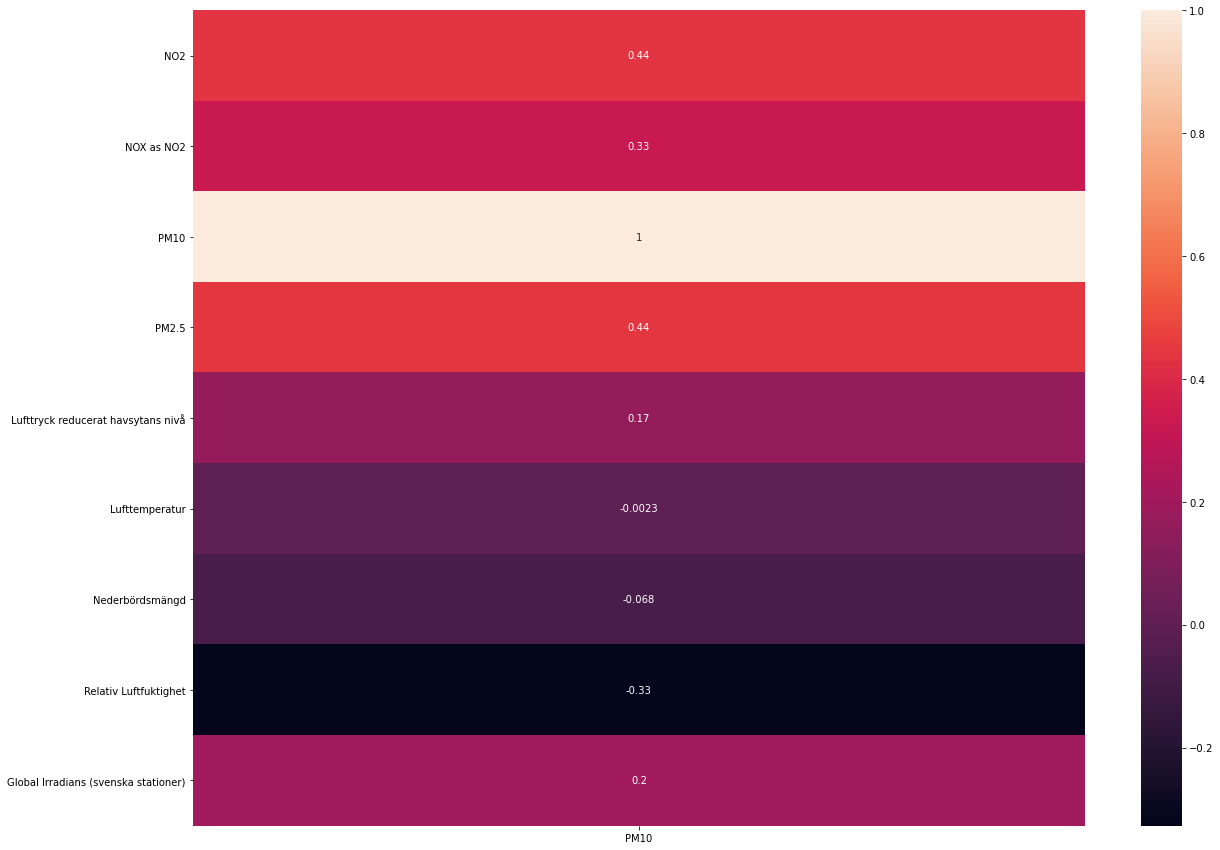

In [232]:
cor = merged[['NO2', 'NOX as NO2', 'PM10', 'PM2.5', 'Station ID', 'Lufttryck reducerat havsytans nivå', 'Lufttemperatur','Nederbördsmängd', 'Relativ Luftfuktighet','Global Irradians (svenska stationer)']].corr()[['PM10'][:]]
plt.subplots(figsize=(20,15))
sns.heatmap(cor, annot=True, linewidths=.0000000001)
plt.show()

In [233]:
merged["Day"] = merged["Day"].astype('category')

merged['Day'].replace(to_replace=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], value=[0, 1, 2, 3, 4, 5, 6], inplace=True)
merged.head()

,Date,NO2,NOX as NO2,PM10,PM2.5,Station ID,Day,Year,Week of Year,Month,Hour,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet,Global Irradians (svenska stationer)
0,2014-01-01 00:00:00,10.4,14.5,56.5,57.7,18644,3,2014,1,1,0,1015.7,2.9,0.0,92,0.0
1,2014-01-01 01:00:00,12.9,20.3,13.0,9.5,18644,3,2014,1,1,1,1015.9,2.8,0.0,93,0.0
2,2014-01-01 02:00:00,9.7,12.9,11.4,6.9,18644,3,2014,1,1,2,1015.4,3.2,0.0,94,0.0
3,2014-01-01 03:00:00,4.4,4.9,12.8,8.4,18644,3,2014,1,1,3,1015.2,3.6,0.0,93,0.0
4,2014-01-01 04:00:00,6.7,8.8,11.0,7.3,18644,3,2014,1,1,4,1014.8,3.0,0.0,92,0.0


In [234]:
merged.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO2,42946.0,34.066770,21.164756,0.3,17.7,30.50,46.800,172.80
NOX as NO2,42953.0,76.179620,67.500767,0.2,29.4,57.10,102.600,926.80
PM10,42674.0,24.849508,23.706543,-2.5,11.0,17.50,29.000,303.20
PM2.5,42258.0,5.999465,5.197502,-3.0,2.8,5.00,7.900,80.10
Day,43323.0,2.999769,2.001627,0.0,1.0,3.00,5.000,6.00
Year,43323.0,2015.987189,1.408111,2014.0,2015.0,2016.00,2017.000,2018.00
Week of Year,43323.0,26.693096,15.078388,1.0,14.0,27.00,40.000,53.00
Month,43323.0,6.541237,3.452578,1.0,4.0,7.00,10.000,12.00
Hour,43323.0,11.491586,6.929449,0.0,5.0,11.00,18.000,23.00
Lufttryck reducerat havsytans nivå,43323.0,1012.674420,11.610985,960.8,1005.6,1013.10,1020.200,1046.70


In [235]:
merged['Relativ Luftfuktighet'] = merged['Relativ Luftfuktighet']/100

merged.head()

,Date,NO2,NOX as NO2,PM10,PM2.5,Station ID,Day,Year,Week of Year,Month,Hour,Lufttryck reducerat havsytans nivå,Lufttemperatur,Nederbördsmängd,Relativ Luftfuktighet,Global Irradians (svenska stationer)
0,2014-01-01 00:00:00,10.4,14.5,56.5,57.7,18644,3,2014,1,1,0,1015.7,2.9,0.0,0.92,0.0
1,2014-01-01 01:00:00,12.9,20.3,13.0,9.5,18644,3,2014,1,1,1,1015.9,2.8,0.0,0.93,0.0
2,2014-01-01 02:00:00,9.7,12.9,11.4,6.9,18644,3,2014,1,1,2,1015.4,3.2,0.0,0.94,0.0
3,2014-01-01 03:00:00,4.4,4.9,12.8,8.4,18644,3,2014,1,1,3,1015.2,3.6,0.0,0.93,0.0
4,2014-01-01 04:00:00,6.7,8.8,11.0,7.3,18644,3,2014,1,1,4,1014.8,3.0,0.0,0.92,0.0


In [250]:
import numpy as np

test = merged.apply(lambda x: np.nan if x < 0 in ['PM10', 'PM2.5'] else x)

#merged['PM10'] = merged.apply(lambda merged: np.nan if merged['PM10'] < 0)
#merged['PM10'] = np.where(merged['PM10'] < 0, np.nan) 

#pm10 = merged['PM10']
#if pm10<0:
#    pm10 = np.nan

#display(pm10)

#merged['PM10'] = merged[merged['PM10'] < 0] = np.nan

TypeError: '<' not supported between instances of 'Timestamp' and 'int'

In [209]:
!pip install miceforest --user

You should consider upgrading via the 'c:\users\ankit pandey\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [208]:
import miceforest as mf

# Create kernels. 
kernel = mf.MultipleImputedKernel(
  data=merged,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

ModuleNotFoundError: No module named 'miceforest'

In [ ]:
from sklearn.impute import SimpleImputer
impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')